<a href="https://colab.research.google.com/github/HELLOMAHI/academic-arena/blob/main/Credit_Fard_fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files. upload ( )

Saving BankChurners.csv to BankChurners.csv


In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load data
df=pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [26]:
df['Class'] = df['Attrition_Flag'].str.strip().apply(lambda x: 1 if x == 'Attrited Customer' else 0)


In [27]:
# Define target variable: 'Attrited Customer' as fraud (1), 'Existing Customer' as not fraud (0)
df['Class'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [28]:
# Drop columns that aren't useful for model training
df.drop(['CLIENTNUM', 'Attrition_Flag'], axis=1, inplace=True)

In [29]:
# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

In [39]:
#Drop duplicate rows
df=df.drop_duplicates()

In [31]:
# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform (X)

In [33]:
#Balance the dataset using SMOTE
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_scaled, y)


In [34]:
#Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [35]:
#Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)


In [36]:
#Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)

In [37]:
#Evaluation
print("Logistic Regression:")
print(classification_report(Y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1]))

print("\nRandom Forest:")
print(classification_report(Y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1]))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2552
           1       1.00      1.00      1.00      2548

    accuracy                           1.00      5100
   macro avg       1.00      1.00      1.00      5100
weighted avg       1.00      1.00      1.00      5100

ROC-AUC Score: 1.0

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2552
           1       1.00      1.00      1.00      2548

    accuracy                           1.00      5100
   macro avg       1.00      1.00      1.00      5100
weighted avg       1.00      1.00      1.00      5100

ROC-AUC Score: 1.0


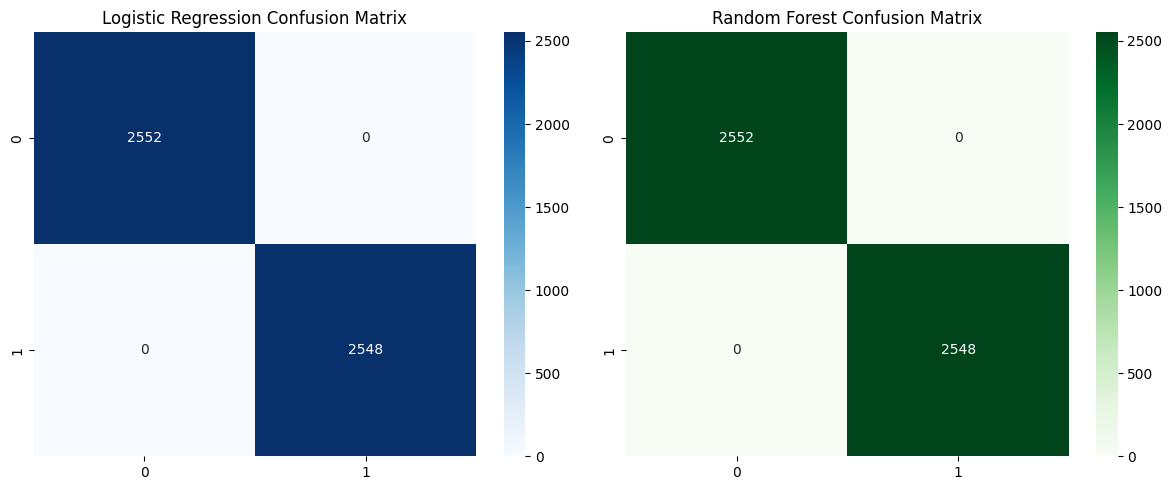

In [38]:
#Plot confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(Y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()